## Prostate Cancer Linear Regression
*Prostate Cancer Dataset* from a study by Stamey et al. (1989).  The study aims to predict prostate-specific antigen levels from clinical measures in men about to receive a radical prostatectomy.  

The data contain 8 features:
* log cancer volume (lcavol)
* log prostate weight (lweight)
* age (age)
* log amount of benign prostatic hyperplasia (lbph)
* seminal vesicle invasion (svi)
* log of capsular penetration (lcp)
* Gleason score (gleason)
* percent of Gleason scores 4 or 5 (pgg45)

The data uses a fixed Train / Test split.

In [21]:
#All finalised needed imports
import pandas as pd
import itertools
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
import matplotlib.pyplot as plt
import numpy as np
import warnings
# Suppress warnings
warnings.filterwarnings("ignore")

In [22]:
df_train = pd.read_csv('prostate_train.csv')
df_train.head()

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa
0,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0,-0.430783
1,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0,-0.162519
2,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20,-0.162519
3,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0,-0.162519
4,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0,0.371564


## Initial Regression 
We will begin by fitting our first ordinary least squares regression model.  But first we need to do a little data management.  You will notice that the data exist in a single data frame (one for Train and one for Test).  The last column of the data frame ('lpsa') is the quantity that we wish to predict (the Y-value).  


In [23]:
features = ['lcavol', 'lweight', 'age', 'lbph', 'svi', 'lcp', 'gleason', 'pgg45']
output = ['lpsa']
X_train = df_train[features]
Y_train = df_train[output]
X_train.head()

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45
0,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0
1,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0
2,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20
3,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0
4,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0



Now we will fit our first model using a single feature ('lcavol').  


R-squared:  0.5375164690552882


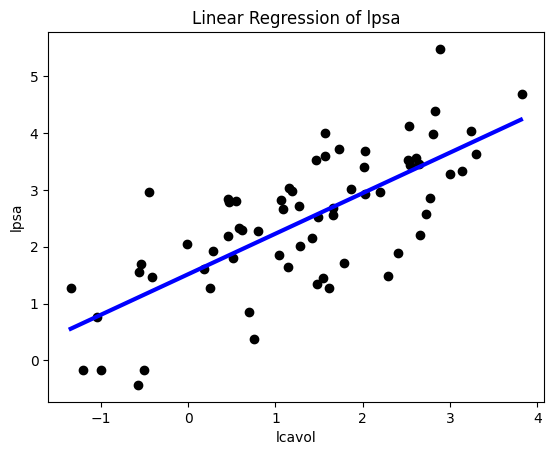

In [24]:
# Fit one feature
lr = linear_model.LinearRegression()
lr.fit(X_train['lcavol'].values.reshape(-1, 1), Y_train)
r2 = lr.score(X_train['lcavol'].values.reshape(-1, 1), Y_train)
print('R-squared: ', r2)

# plot
x = np.arange(X_train['lcavol'].min(), X_train['lcavol'].max(), 0.01)
y = lr.predict(x.reshape(-1,1))
plt.scatter(X_train['lcavol'], Y_train, color='black')
plt.plot(x, y, color='blue', linewidth=3)
plt.xlabel('lcavol')
plt.ylabel('lpsa')
plt.title('Linear Regression of lpsa')
plt.show()

## Best Subset Feature Selection
Now we will look at finding the best subset of features out of all possible subsets. We will break this into subproblems to walk through it. 

In [25]:
def findsubsets(S,k):
    return set(itertools.combinations(S, k))

### (a)

We will start by getting familiar with the findsubsets() function.  The variable 'features' was defined previously as a set of all feature names.  

In [26]:
subsets3 = findsubsets(features, 3)
best_score3 = -np.Inf
best_features3 = []
for feats in subsets3:
  this_X = X_train[list(feats)]
  cvs = cross_val_score(linear_model.LinearRegression(), 
                             this_X, Y_train, cv=5, scoring='r2')
  this_score = cvs.mean()
  if this_score > best_score3:
    best_score3 = this_score
    best_features3 = feats

# report
print('Best R2: ', best_score3)
print('Best Features: ', best_features3)

Best R2:  -6.611191159159723
Best Features:  ('lcavol', 'lweight', 'age')


### (b)

Now, we repeat the above process for all subsets of all sizes.  

Best R2:  -6.507279708487542
Best Features:  ('lcavol', 'lweight')


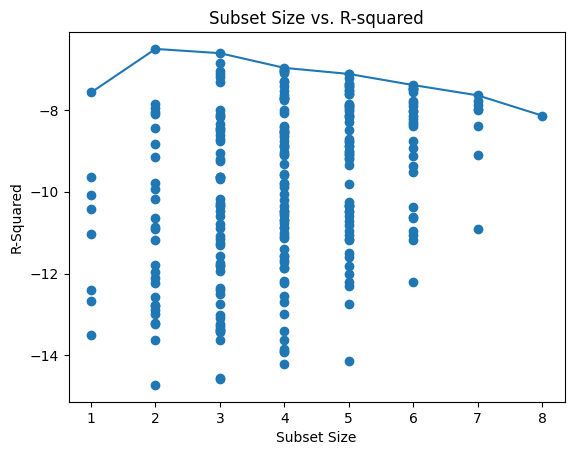

In [27]:
# iterate powerset of features
from sklearn.metrics import r2_score
scores = []
k_vals = []
best_score = -np.Inf + np.zeros(len(features) + 1)
best_features = [[]]
for k in range(1,len(features) + 1):    
    best_features.append([])    
    subs = list(findsubsets(features,k))
    
    # score all combinations of k features
    this_score = np.zeros(len(subs))
    for i in range(len(subs)):
        this_X = X_train[list(subs[i])]        
        cvs = cross_val_score(linear_model.LinearRegression(), 
                             this_X, Y_train, cv=5, scoring='r2')
# 		tmp = linear_model.LinearRegression()
# 		tmp.fit(this_X, Y_train)
# 		print(r2_score(tmp.predict(this_X), Y_train))
# 		print(tmp.predict(this_X) - Y_train)

        scores.append(cvs.mean())
        k_vals.append(k)
        
        # check score
        if cvs.mean() > best_score[k]:
            best_score[k] = cvs.mean()
            best_features[k] = subs[i]

# pick-and-report best features
idx = np.argmax(best_score)
best_features_allsubsets = best_features[idx]
print('Best R2: ', best_score[idx])
print('Best Features: ', best_features_allsubsets)

# show scores
plt.scatter(k_vals, scores)
plt.plot(range(len(features) + 1), best_score)
plt.title('Subset Size vs. R-squared')
plt.xlabel('Subset Size')
plt.ylabel('R-Squared')
plt.show()


In [28]:
display(subs)
display(subs[0])
display(subs[0][0])
display(subs[0])
X_train[list(subs[0])]

[('lcavol', 'lweight', 'age', 'lbph', 'svi', 'lcp', 'gleason', 'pgg45')]

('lcavol', 'lweight', 'age', 'lbph', 'svi', 'lcp', 'gleason', 'pgg45')

'lcavol'

('lcavol', 'lweight', 'age', 'lbph', 'svi', 'lcp', 'gleason', 'pgg45')

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45
0,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0
1,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0
2,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20
3,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0
4,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0
...,...,...,...,...,...,...,...,...
62,3.246491,4.101817,68,-1.386294,0,-1.386294,6,0
63,2.532903,3.677566,61,1.348073,1,-1.386294,7,15
64,2.830268,3.876396,68,-1.386294,1,1.321756,7,60
65,3.821004,3.896909,44,-1.386294,1,2.169054,7,40


We have found the best set of features by brute-force search over all possible features.  

## Ridge Regression 


The problem with brute force search over features is that it doesn't scale well.  We can do it for 8 features, but we can't do it for larger sets of features.  Instead, we will look at a simpler model selection strategy by using L2 regularized linear regression (a.k.a. Ridge Regression). 

In [29]:
def printFeatureWeights(f, w):
  for idx in range(len(f)):
    print('%s : %f' % (f[idx], w[idx]))

l2 = linear_model.Ridge(alpha=0.5).fit(X_train, Y_train)
printFeatureWeights(features, l2.coef_[0])


lcavol : 0.576706
lweight : 0.593447
age : -0.018544
lbph : 0.145617
svi : 0.683643
lcp : -0.193621
gleason : -0.034175
pgg45 : 0.009508




We chose the regularization coefficient alpha=0.5 somewhat arbitrarily.  We now need to perform model selection in order to learn the best value of alpha.  We will do that by using cross_val_score over a range of values for alpha.  When searching for regularization parameters it is generally good practice to search in log-domain, rather than linear domain.  For example, we will search in the range $[10^{-1}, 10^3]$.  Using Numpy's "logspace" function this corresponds to the range $[-1, 3]$ in log-domain.  

Best Alpha:  6.25055192527397


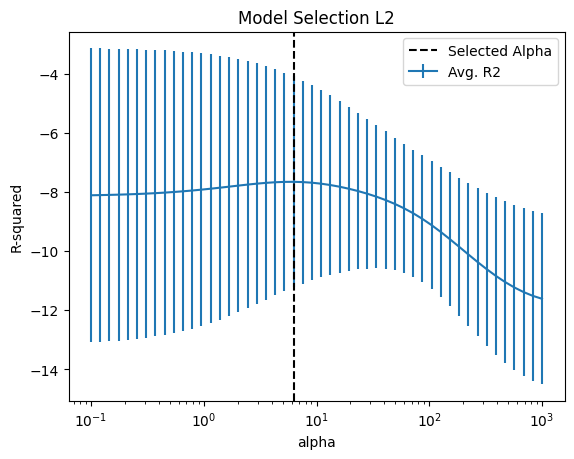

In [30]:
# from sklearn.linear_model import RidgeCV
alphas = np.logspace(-1, 3, num=50)
cv = 5

# do cross-validation
scores = np.zeros((len(alphas), cv))
for idx in range(len(alphas)):
  l2 = linear_model.Ridge(alpha=alphas[idx])
  scores[idx,:] = cross_val_score(l2, X_train, Y_train, cv=cv, scoring='r2')

# select best alpha
mean_r2 = np.mean(scores, axis=1)
std_r2 = np.std(scores, axis=1)
alpha_idx = np.argmax(mean_r2)
best_alpha_l2 = alphas[alpha_idx]
print('Best Alpha: ', best_alpha_l2)
  
# plot
plt.errorbar(alphas, mean_r2, yerr=std_r2, label='Avg. R2')
plt.axvline(best_alpha_l2, linestyle='--', color="k", label="Selected Alpha")
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('R-squared')
plt.title('Model Selection L2')
plt.legend()
plt.show()


Now we have a good model.

## LASSO 
Ridge regression performs shrinkage of the weights using the L2 norm.  This will drive some weights *close* to zero, but not exactly zero.  The LASSO method replaces the L2 penalty with an L1 penalty.  Due to properties of L1 discussed in lecture, this has the effect of learning exactly zero weights on some features when it is supported by the data.  For this we will repeat procedure of learning a Ridge regression model, but we will instead use LASSO.  Let's start by fitting a LASSO model with a fixed alpha value.  



In [31]:
l1 = linear_model.Lasso(alpha=0.1).fit(X_train, Y_train)
printFeatureWeights(features, l1.coef_)

lcavol : 0.538986
lweight : 0.184891
age : -0.006352
lbph : 0.128433
svi : 0.000000
lcp : -0.000000
gleason : -0.000000
pgg45 : 0.007727



Now we will find a good value of alpha using cross-validation.  Due to differences in how the LASSO model is optimized, there are dedicated methods for performing cross-validation on LASSO.  Scikit-Learn's LassoLarsCV class performs LASSO-specific cross-validation using an optimized [Least Angle Regression](https://en.wikipedia.org/wiki/Least-angle_regression) (LARS) algorithm.  

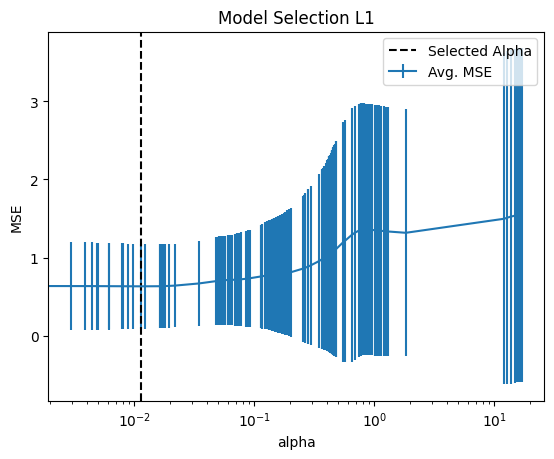

In [32]:
from sklearn.linear_model import LassoLarsCV, LassoCV

l1 = LassoLarsCV(cv=20, normalize=False).fit(X_train, Y_train)

# compute stats
mean_mse = l1.mse_path_.mean(axis=-1)
std_mse = l1.mse_path_.std(axis=-1)
best_alpha_l1 = l1.alpha_

# plot stuff
plt.errorbar(l1.cv_alphas_, mean_mse, yerr=std_mse, label='Avg. MSE')
plt.axvline(best_alpha_l1, linestyle='--', color="k", label="Selected Alpha")
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.title('Model Selection L1')
plt.legend()
plt.show()

## Evaluate on Test 

We will train all of the best performing models chosen by Best Subsets, Ridge Regression, and LASSO.  We will evaluate and compare these models on the test data.  This dataset uses a standard train / test split so we begin by loading test data below.

In [33]:
df_test = pd.read_csv('prostate_test.csv')
df_test.head()

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa
0,0.737164,3.473518,64,0.615186,0,-1.386294,6,0,0.765468
1,-0.776529,3.539509,47,-1.386294,0,-1.386294,6,0,1.047319
2,0.223144,3.244544,63,-1.386294,0,-1.386294,6,0,1.047319
3,1.205971,3.442019,57,-1.386294,0,-0.430783,7,5,1.398717
4,2.059239,3.501043,60,1.474763,0,1.348073,7,20,1.658228




All of the data are stored in a single table, with the final column being the output 'lpsa'.  Before evaluating on test we must first create X_test and Y_test input/outputs where Y_test is the final column of the DataFrame, and X_test contains all other columns.

In [34]:
X_test = df_test[['lcavol', 'lweight', 'age', 'lbph', 'svi', 'lcp', 'gleason', 'pgg45']]
Y_test = df_test['lpsa']

Best Subsets  
We found the best subset of features for an ordinary least squares regression model by enumerating all feature subsets.  Using the best selected features, we train the model below and report mean squared error and $R^2$ on the test set.

In [35]:
from sklearn.metrics import mean_squared_error

#train
best_subsets_best = linear_model.LinearRegression()
best_subsets_best.fit(X_train[list(best_features_allsubsets)],Y_train)

#predict
best_subsets_predict =  best_subsets_best.predict(X_test[list(best_features_allsubsets)])

#mse
best_subsets_mse = mean_squared_error(Y_test,best_subsets_predict)
print('Best Subsets MSE : ',best_subsets_mse)

Best Subsets MSE :  0.49248234768050364


### Ridge Regression

In the cell below, we train a Ridge Regression model using the optimal regularization coefficient ($\alpha$) found earlier.  

In [36]:
l2_best = linear_model.Ridge(alpha=best_alpha_l2).fit(X_train, Y_train)
l2_predict = l2_best.predict(X_test)
l2_mse = mean_squared_error(Y_test, l2_predict)
print('L2 MSE : ',l2_mse)

L2 MSE :  0.5273494592770832


### LASSO Regression
Now, we train and evaluate the final model.  

In [37]:
lasso_predict =  l1.predict(X_test)
lasso_mse = mean_squared_error(Y_test, lasso_predict)
print('Lasso MSE : ',lasso_mse)

Lasso MSE :  0.5077062843682016


### Compare feature weights for each model

Now let's compare the feature weight learned by each of the three models.  In the cell below, we have the regression weights for each feature under Best Subset, Ridge, and Lasso models evaluated above. 

In [38]:
feature_weights_best_subset = list(best_subsets_best.coef_[0])+ ['-']*6 #since the last 6 features are not considered in the model
test_errors_row = {'Features': 'Test Error',
                   'Best Subset': best_subsets_mse, 
                   'Ridge': l2_mse,
                   'LASSO' : lasso_mse
                   }

In [39]:
results_df = pd.DataFrame({'Features':features,
                   'Best Subset': feature_weights_best_subset, 
                   'Ridge': l2_best.coef_[0],
                   'LASSO' : l1.coef_
                   })

results_df = results_df.append(test_errors_row,ignore_index=True).set_index('Features')

In [40]:
results_df

,Best Subset,Ridge,LASSO
Features,,,
lcavol,0.627607,0.550337,0.566300
lweight,0.738375,0.430148,0.572821
age,-,-0.014697,-0.017878
lbph,-,0.154290,0.141910
svi,-,0.387669,0.611769
lcp,-,-0.102993,-0.162829
gleason,-,-0.046865,0.000000
pgg45,-,0.009390,0.008575
Test Error,0.492482,0.527349,0.507706
